## House Price Prediction using Machine Learning

House price prediction is a problem in the real estate industry to make informed decisions. By using machine learning algorithms we can predict the price of a house based on various features such as location, size, number of bedrooms and other relevant factors. 

### Import Relevant Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
dataset = pd.read_excel('HousePricePrediction.xlsx')
dataset.head(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
8,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0.0,952.0,129900.0
9,9,190,RL,7420,Corner,2fmCon,6,1939,1950,MetalSd,0.0,991.0,118000.0


In [3]:
dataset.shape

(2919, 13)

### Data Preprocessing

We categorize the features depending on their datatype (int, float, object) and then calculate the number of them. 


In [4]:
dataset.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [5]:
obj = (dataset.dtypes == 'object')
obj

Id              False
MSSubClass      False
MSZoning         True
LotArea         False
LotConfig        True
BldgType         True
OverallCond     False
YearBuilt       False
YearRemodAdd    False
Exterior1st      True
BsmtFinSF2      False
TotalBsmtSF     False
SalePrice       False
dtype: bool

In [6]:
# By using obj[obj], we’re filtering this boolean Series to only keep the True values.
obj_cols = list(obj[obj].index)
obj_cols

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [7]:
print('Categorical variables: ', len(obj_cols))

Categorical variables:  4


In [8]:
integers = (dataset.dtypes == 'int64')
int_cols = list(integers[integers].index)
print('Integer variables: ',len(int_cols))

fl = (dataset.dtypes == 'float64')
fl_cols = list(fl[fl].index)
print('Float variables: ', len(fl_cols))

Integer variables:  6
Float variables:  3


### EDA

EDA refers to the deep analysis of data so as to discover different patterns and spot anomalies. Before making inferences from data it is essential to examine all your variables.

In [9]:
numerical_dataset = dataset.select_dtypes(include=['number'])
numerical_dataset                                         

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,8450,5,2003,2003,0.0,856.0,208500.0
1,1,20,9600,8,1976,1976,0.0,1262.0,181500.0
2,2,60,11250,5,2001,2002,0.0,920.0,223500.0
3,3,70,9550,5,1915,1970,0.0,756.0,140000.0
4,4,60,14260,5,2000,2000,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...
2914,2914,160,1936,7,1970,1970,0.0,546.0,NaN
2915,2915,160,1894,5,1970,1970,0.0,546.0,NaN
2916,2916,20,20000,7,1960,1996,0.0,1224.0,NaN
2917,2917,85,10441,5,1992,1992,0.0,912.0,NaN


<Axes: >

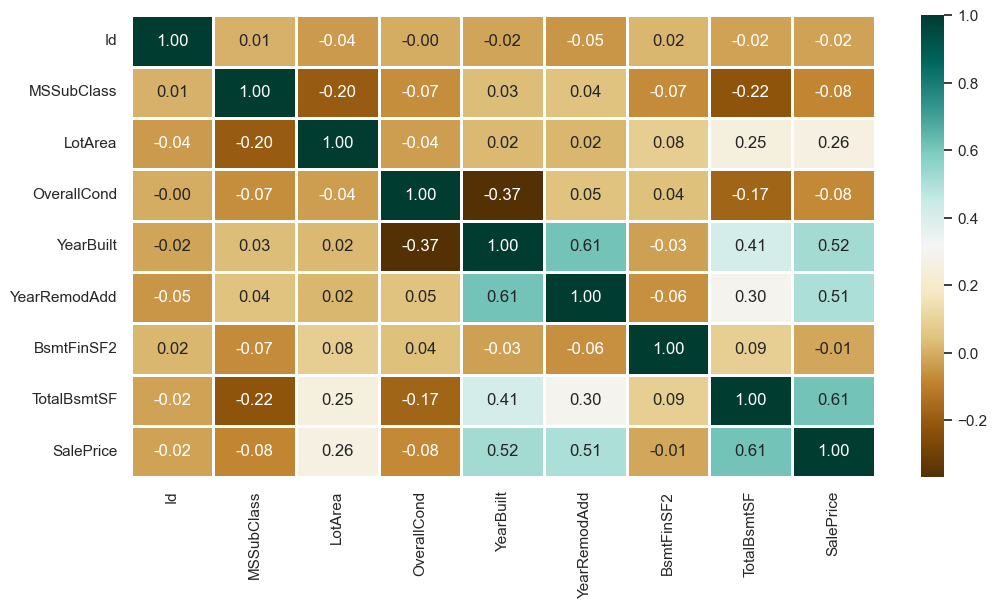

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(numerical_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

To analyze the different categorical features. We will draw the barplot.

<Axes: title={'center': 'No. of Unique values of Categorical Features'}>

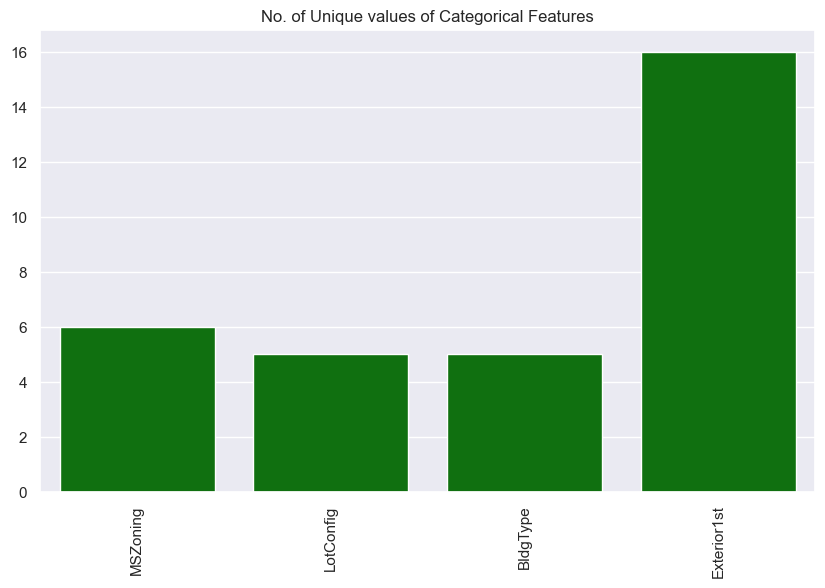

In [11]:
unique_values = []

for col in obj_cols:
    unique_values.append(dataset[col].unique().size)

plt.figure(figsize=(10,6))
plt.title('No. of Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=obj_cols, y=unique_values,color='Green')


The plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories. To findout the actual count of each category we can plot the bargraph of each four features separately.


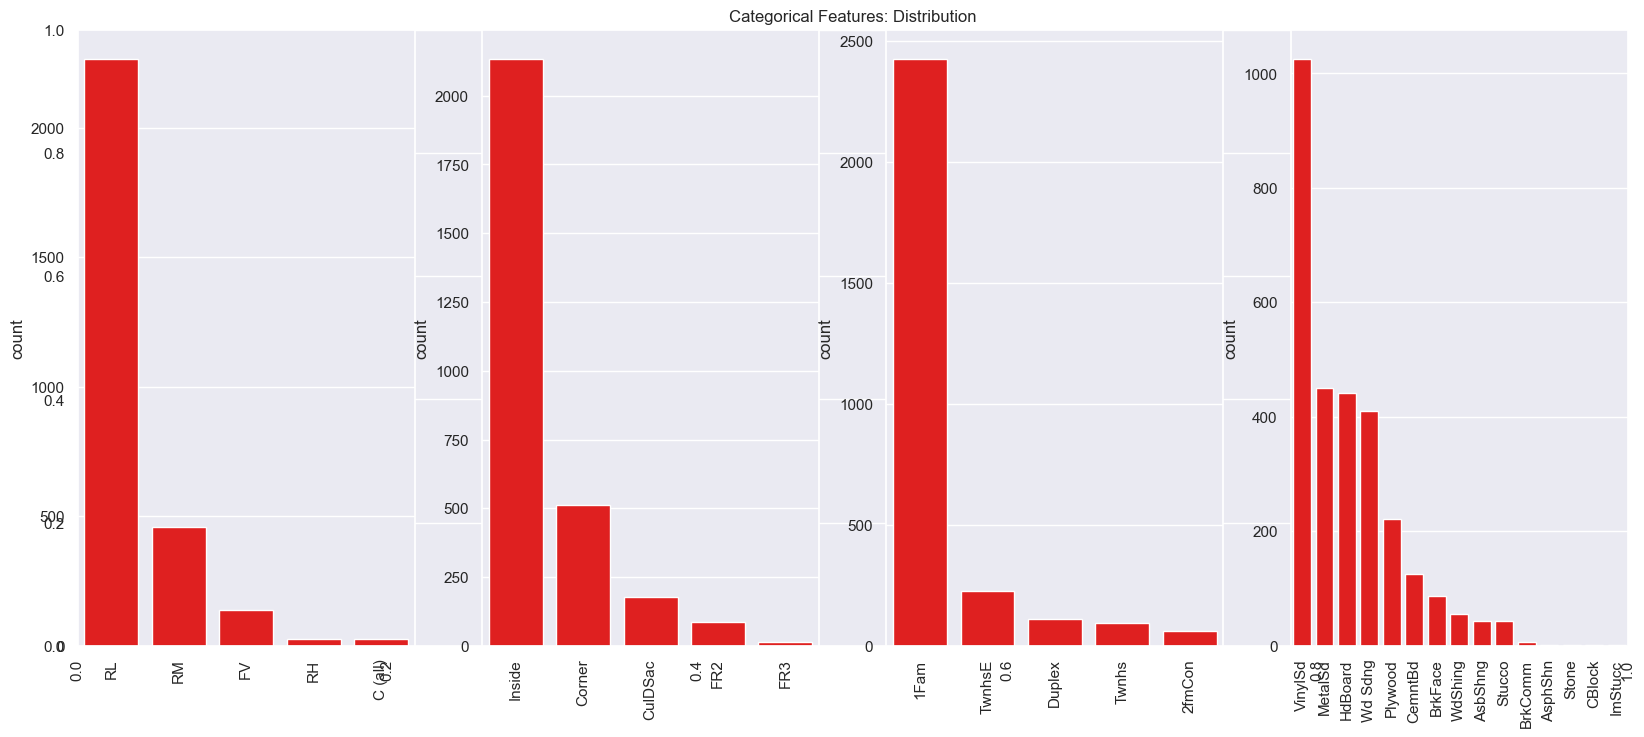

In [12]:
plt.figure(figsize=(20,8))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in obj_cols:
    y = dataset[col].value_counts()
    plt.subplot(1, 4 , index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y, color='Red')
    index += 1

### Data Cleaning

Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data. As in our dataset there are some columns that are not important and irrelevant for the model training. So we can drop that column before training. There are 2 approaches to dealing with empty/null values

* We can easily delete the column/row (if the feature or record is not much important).
* Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement).

In [13]:
# As Id Column will not be participating in any prediction. So we can Drop it.
dataset.drop(['Id'], axis=1,inplace=True)
dataset.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [14]:
# Replacing SalePrice empty values with their mean values to make the data distribution symmetric.
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

In [15]:
# Drop records with null values (as the empty records are very less).
# by default dropna() removes rows that have any NaN values, for columns we can specify, axis=1
new_dataset = dataset.dropna()

In [16]:
new_dataset.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [17]:
# Checking features which have null values in the new dataframe (if there are still any).
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

### OneHotEncoder - For Label categorical features

One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int. So for that firstly we have to collect all the features which have the object datatype.

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
s = (new_dataset.dtypes == 'object')
obj_cols = list(s[s].index)
print('List of categorical variable:',end=' ')
print(obj_cols)
print('Number of categorical variables: ',len(obj_cols))

List of categorical variable: ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
Number of categorical variables:  4


In [20]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[obj_cols]))

In [21]:
OH_cols.index = new_dataset.index

In [22]:
OH_cols.columns = OH_encoder.get_feature_names_out()
OH_cols

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_final = new_dataset.drop(obj_cols, axis=1)
df_final.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,8450,5,2003,2003,0.0,856.0,208500.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0


In [24]:
df_final = pd.concat([df_final,OH_cols],axis=1)
df_final.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Splitting Dataset into Training and Testing
X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

### Model training and accuracy

As we have to train the model to determine the continuous values, so we will be using these regression models.

* SVM-Support Vector Machine
* Random Forest Regressor
* Linear Regressor
  
And To calculate loss we will be using the mean_absolute_percentage_error module. It can easily be imported by using sklearn library. 


### SVM - Support vector Machine
Support vector Machine is a supervised machine learning algorithm primarily used for classification tasks though it can also be used for regression. It works by finding the hyperplane that best divides a dataset into classes. The goal is to maximize the margin between the data points and the hyperplane.

In [27]:
from sklearn import svm
from sklearn.metrics import mean_absolute_percentage_error

In [28]:
model_SVR = svm.SVR()
model_SVR.fit(x_train,y_train)

y_predict = model_SVR.predict(x_test)

print(mean_absolute_percentage_error(y_test, y_predict))

0.18705129318704236


### Random Forest Regression
Random Forest is an ensemble learning algorithm used for both classification and regression tasks. It constructs multiple decision trees during training where each tree in the forest is built on a random subset of the data and features, ensuring diversity in the model. The final output is determined by averaging the outputs of individual trees (for regression) or by majority voting (for classification).

In [29]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(x_train,y_train)

y_predict = model_RFR.predict(x_test)

print(mean_absolute_percentage_error(y_test, y_predict))

0.19010630208349225


### Linear Regression
Linear Regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables. The goal is to find the line that best fits the data. This is done by minimizing the sum of the squared differences between the observed and predicted values. Linear regression assumes that the relationship between variables is linear.




In [30]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

y_predict = model_LR.predict(x_test)

print(mean_absolute_percentage_error(y_test, y_predict))

0.187416838415999
